In [43]:
import pickle

In [44]:
with open('../data_example/output_ccm.pkl', 'rb') as f:
    efms = pickle.load(f)

In [58]:
efms

,ack,acn,ada,adh,ald,atp-synth,biomass,csn,cytbd,eda,...,pyk,rpe,rpi,scs,sdh,tal,tim,tkt1,tkt2,zwf
0,0.0,0.000000,0.0,0.0,0.000000,0.00,0.00000,0.000000,0.000000,0.0,...,0.000000,0.0000,0.000000,0.000000,0.050000,0.0000,0.000000,0.0000,0.00,0.000000
1,0.0,0.100000,0.0,0.0,-0.050000,0.00,0.00000,0.100000,0.600000,0.1,...,2.550000,0.0000,0.000000,0.100000,0.100000,0.0000,-0.050000,0.0000,0.00,0.100000
2,0.0,0.100000,0.0,0.0,-0.050000,-0.05,0.00000,0.100000,0.500000,0.1,...,2.250000,0.0000,0.000000,0.100000,0.100000,0.0000,-0.050000,0.0000,0.00,0.100000
3,0.0,0.100000,0.0,0.0,-0.050000,0.00,0.00000,0.100000,0.500000,0.1,...,2.050000,0.0000,0.000000,0.100000,0.100000,0.0000,-0.050000,0.0000,0.00,0.100000
4,0.0,0.100000,0.0,0.0,-0.050000,-0.05,0.00000,0.100000,0.600000,0.1,...,2.750000,0.0000,0.000000,0.100000,0.100000,0.0000,-0.050000,0.0000,0.00,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,0.0,6.743564,0.0,0.0,8.009653,0.00,0.09901,6.743564,28.144554,0.0,...,116.516089,0.0000,0.272772,6.450495,0.000000,0.0500,8.009653,0.0500,-0.05,0.272772
5285,0.0,3.405500,0.0,0.0,2.403500,0.00,0.05000,3.405500,17.622000,0.0,...,71.062500,0.0505,0.163000,3.257500,3.257500,0.0505,2.403500,0.0505,0.00,0.213500
5286,0.0,6.663000,0.0,0.0,4.032250,0.00,0.05000,6.663000,33.909500,0.0,...,137.841250,0.0505,0.163000,6.515000,6.515000,0.0505,4.032250,0.0505,0.00,0.213500
5287,0.0,6.743564,0.0,0.0,4.784406,0.00,0.09901,6.743564,34.595050,0.0,...,139.092822,0.0000,0.272772,6.450495,6.450495,0.0500,4.784406,0.0500,-0.05,0.272772


In [46]:
# select only biomass-producing efms
df_biomass = efms.copy()
df_biomass = df_biomass.loc[df_biomass['biomass'] > 0]

In [47]:
# compute operating costs or yields
# units are O2 Mol / C Mol Biomass and C Mol Glucose / C Mol Biomass
# 1 Glucose molecule corresponds to 6 C Mol
df_yields = df_biomass.copy()
df_yields['o2_biomass_yield'] = df_yields['ex-o2'] / df_yields['biomass']
df_yields['c_biomass_yield'] = 6*df_yields['pts'] / df_yields['biomass']
df_yields

,ack,acn,ada,adh,ald,atp-synth,biomass,csn,cytbd,eda,...,rpi,scs,sdh,tal,tim,tkt1,tkt2,zwf,o2_biomass_yield,c_biomass_yield
20,0.0,17.776000,0.0,0.0,-9.563500,0.0,0.050000,17.776000,107.255500,19.177500,...,0.112500,17.628000,17.628000,0.0000,-9.563500,0.0000,-0.050500,19.239500,1072.555000,1170.480
21,0.0,42.956452,0.0,0.0,-23.087500,0.0,0.120968,42.956452,258.889113,46.347177,...,0.222177,42.598387,42.598387,-0.0500,-23.087500,-0.0500,-0.172177,46.347177,1070.075000,1168.000
22,0.0,17.776000,0.0,0.0,-9.563500,0.0,0.050000,17.776000,89.171500,19.177500,...,0.112500,17.628000,17.628000,0.0000,-9.563500,0.0000,-0.050500,19.239500,891.715000,1170.480
23,0.0,42.956452,0.0,0.0,-23.087500,0.0,0.120968,42.956452,215.187500,46.347177,...,0.222177,42.598387,42.598387,-0.0500,-23.087500,-0.0500,-0.172177,46.347177,889.441667,1168.000
24,0.0,17.826500,0.0,0.0,-9.614000,0.0,0.050000,17.826500,89.727000,19.228000,...,0.163000,17.678500,17.678500,0.0505,-9.614000,0.0505,0.000000,19.441500,897.270000,1176.540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,0.0,6.743564,0.0,0.0,8.009653,0.0,0.099010,6.743564,28.144554,0.000000,...,0.272772,6.450495,0.000000,0.0500,8.009653,0.0500,-0.050000,0.272772,142.130000,505.215
5285,0.0,3.405500,0.0,0.0,2.403500,0.0,0.050000,3.405500,17.622000,0.000000,...,0.163000,3.257500,3.257500,0.0505,2.403500,0.0505,0.000000,0.213500,176.220000,311.280
5286,0.0,6.663000,0.0,0.0,4.032250,0.0,0.050000,6.663000,33.909500,0.000000,...,0.163000,6.515000,6.515000,0.0505,4.032250,0.0505,0.000000,0.213500,339.095000,506.730
5287,0.0,6.743564,0.0,0.0,4.784406,0.0,0.099010,6.743564,34.595050,0.000000,...,0.272772,6.450495,6.450495,0.0500,4.784406,0.0500,-0.050000,0.272772,174.705000,309.765


In [48]:
# 106.86 is the actual number of C moles in the biomass computed from stoichiometry and metabolites formula
# the biomass of this model seems to be calibrated to 1 Glucose molecule so we divide yields by 6 as well
# we obtain results similar to Carlson and Srienc, 2004
num_c_moles_biomass = 106.86
df_yields['o2_biomass_yield'] /= num_c_moles_biomass
df_yields['c_biomass_yield'] /= num_c_moles_biomass
df_yields

,ack,acn,ada,adh,ald,atp-synth,biomass,csn,cytbd,eda,...,rpi,scs,sdh,tal,tim,tkt1,tkt2,zwf,o2_biomass_yield,c_biomass_yield
20,0.0,17.776000,0.0,0.0,-9.563500,0.0,0.050000,17.776000,107.255500,19.177500,...,0.112500,17.628000,17.628000,0.0000,-9.563500,0.0000,-0.050500,19.239500,10.037011,10.953397
21,0.0,42.956452,0.0,0.0,-23.087500,0.0,0.120968,42.956452,258.889113,46.347177,...,0.222177,42.598387,42.598387,-0.0500,-23.087500,-0.0500,-0.172177,46.347177,10.013803,10.930189
22,0.0,17.776000,0.0,0.0,-9.563500,0.0,0.050000,17.776000,89.171500,19.177500,...,0.112500,17.628000,17.628000,0.0000,-9.563500,0.0000,-0.050500,19.239500,8.344703,10.953397
23,0.0,42.956452,0.0,0.0,-23.087500,0.0,0.120968,42.956452,215.187500,46.347177,...,0.222177,42.598387,42.598387,-0.0500,-23.087500,-0.0500,-0.172177,46.347177,8.323429,10.930189
24,0.0,17.826500,0.0,0.0,-9.614000,0.0,0.050000,17.826500,89.727000,19.228000,...,0.163000,17.678500,17.678500,0.0505,-9.614000,0.0505,0.000000,19.441500,8.396687,11.010107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,0.0,6.743564,0.0,0.0,8.009653,0.0,0.099010,6.743564,28.144554,0.000000,...,0.272772,6.450495,0.000000,0.0500,8.009653,0.0500,-0.050000,0.272772,1.330058,4.727821
5285,0.0,3.405500,0.0,0.0,2.403500,0.0,0.050000,3.405500,17.622000,0.000000,...,0.163000,3.257500,3.257500,0.0505,2.403500,0.0505,0.000000,0.213500,1.649074,2.912970
5286,0.0,6.663000,0.0,0.0,4.032250,0.0,0.050000,6.663000,33.909500,0.000000,...,0.163000,6.515000,6.515000,0.0505,4.032250,0.0505,0.000000,0.213500,3.173264,4.741999
5287,0.0,6.743564,0.0,0.0,4.784406,0.0,0.099010,6.743564,34.595050,0.000000,...,0.272772,6.450495,6.450495,0.0500,4.784406,0.0500,-0.050000,0.272772,1.634896,2.898793


In [49]:
# filter efms with yields that are outliers
df_yields_filter = df_yields.copy()
df_yields_filter = df_yields_filter.loc[df_yields['o2_biomass_yield'] < 1]
df_yields_filter = df_yields_filter.loc[df_yields['c_biomass_yield'] < 10]
df_yields_filter

,ack,acn,ada,adh,ald,atp-synth,biomass,csn,cytbd,eda,...,rpi,scs,sdh,tal,tim,tkt1,tkt2,zwf,o2_biomass_yield,c_biomass_yield
53,0.000000,0.358065,2.730242,2.730242,14.613952,0.234032,0.120968,0.358065,0.000000,2.683065,...,0.222177,0.000000,0.000000,-0.0500,14.613952,-0.0500,-0.172177,2.683065,0.000000,8.162568
54,0.000000,0.148000,1.190500,1.190500,6.172700,0.067800,0.050000,0.148000,0.000000,0.985000,...,0.112500,0.000000,0.000000,0.0000,6.172700,0.0000,-0.050500,1.047000,0.000000,8.195059
55,-1.649395,0.358065,1.080847,1.080847,14.613952,1.883427,0.120968,0.358065,0.000000,2.683065,...,0.222177,0.000000,0.000000,-0.0500,14.613952,-0.0500,-0.172177,2.683065,0.000000,8.162568
56,-0.743750,0.148000,0.446750,0.446750,6.172700,0.811550,0.050000,0.148000,0.000000,0.985000,...,0.112500,0.000000,0.000000,0.0000,6.172700,0.0000,-0.050500,1.047000,0.000000,8.195059
57,0.000000,0.892742,4.334274,4.334274,16.953091,0.000000,0.120968,0.892742,0.000000,2.148387,...,0.222177,0.534677,0.000000,-0.0500,16.953091,-0.0500,-0.172177,2.148387,0.000000,9.000125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,0.000000,0.896582,0.000000,0.000000,0.937873,6.002836,0.050000,0.896582,5.978993,0.236418,...,0.112500,0.748582,0.748582,0.0000,0.937873,0.0000,-0.050500,0.298418,0.559516,1.475902
5269,0.000000,1.019050,0.000000,0.000000,1.645800,4.772900,0.050000,1.019050,4.818700,0.000000,...,0.163000,0.871050,0.000000,0.0505,1.645800,0.0505,0.000000,0.213500,0.450936,2.062100
5270,0.000000,2.082921,0.000000,0.000000,3.349010,9.321287,0.099010,2.082921,9.501980,0.000000,...,0.272772,1.789851,0.000000,0.0500,3.349010,0.0500,-0.050000,0.272772,0.449045,2.084784
5275,0.000000,1.036827,0.000000,0.000000,1.219163,5.626173,0.050000,1.036827,5.778633,0.000000,...,0.163000,0.888827,0.888827,0.0505,1.219163,0.0505,0.000000,0.213500,0.540767,1.583002


In [50]:
# returns True if the row is at the pareto frontier for variables xlabel and ylabel
config_base = df_yields_filter
def is_pareto_front(row, xlabel, ylabel):
    
    x = row[xlabel]
    y = row[ylabel]
    
    # look for points with the same y value but smaller x value
    is_min_x = config_base.loc[config_base[ylabel]==y].min()[xlabel] >= x
    # look for points with the same x value but smaller y value
    is_min_y = config_base.loc[config_base[xlabel]==x].min()[ylabel] >= y
    # look for points that are smaller in both x and y
    is_double = len(config_base.loc[(config_base[xlabel]<x) & (config_base[ylabel]<y)])==0
    
    return is_min_x and is_min_y and is_double

# array of True/False indicating whether the corresponding row is on the pareto frontier
is_pareto = df_yields.apply(lambda row: is_pareto_front(row, 'c_biomass_yield', 'o2_biomass_yield'), axis=1)

In [51]:
# compute pareto optimal efms
is_pareto[is_pareto == True]
df_biomass_pareto = df_yields.loc[is_pareto].sort_values('c_biomass_yield')
df_biomass_pareto # efms in orange in figure below

,ack,acn,ada,adh,ald,atp-synth,biomass,csn,cytbd,eda,...,rpi,scs,sdh,tal,tim,tkt1,tkt2,zwf,o2_biomass_yield,c_biomass_yield
5064,-5.607636,4.862475,0.000000,0.000000,1.408871,17.968548,0.120968,4.862475,19.109980,0.0,...,0.222177,4.504410,4.504410,-0.050000,1.408871,-0.050000,-0.172177,0.000000,0.739172,0.787947
5065,-2.275844,1.967844,0.000000,0.000000,0.572000,7.427000,0.050000,1.967844,7.854875,0.0,...,0.112500,1.819844,1.819844,0.000000,0.572000,0.000000,-0.050500,0.062000,0.735062,0.799551
5067,-4.405059,3.795158,0.000000,0.000000,1.107673,14.706931,0.099010,3.795158,15.447958,0.0,...,0.272772,3.502088,3.502088,0.050000,1.107673,0.050000,-0.050000,0.272772,0.730041,0.813728
5066,-2.173266,1.865266,0.000000,0.000000,0.546750,7.427000,0.050000,1.865266,7.747562,0.0,...,0.163000,1.717266,1.717266,0.050500,0.546750,0.050500,0.000000,0.213500,0.725020,0.827906
4230,-1.770063,1.462063,0.000000,0.000000,0.447500,7.427000,0.050000,1.462063,7.325750,0.0,...,0.361500,1.314062,1.314062,0.249000,0.447500,0.249000,0.198500,0.809000,0.685547,0.939360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,-0.983125,0.148000,0.527125,0.527125,4.466979,0.000000,0.050000,0.148000,0.506250,0.0,...,0.276667,0.000000,0.000000,0.164167,4.466979,0.164167,0.113667,0.554500,0.047375,5.357828
458,-0.899750,0.148000,0.443750,0.443750,4.592042,0.000000,0.050000,0.148000,0.339500,0.0,...,0.276667,0.000000,0.000000,0.164167,4.592042,0.164167,0.113667,0.554500,0.031771,5.498269
897,3.205375,0.148000,4.888375,4.888375,4.931542,-4.784125,0.050000,0.148000,0.000000,0.0,...,0.276667,0.000000,0.000000,0.164167,4.931542,0.164167,0.113667,0.554500,0.000000,5.879515
451,-1.069500,0.148000,0.613500,0.613500,4.931542,-0.509250,0.050000,0.148000,0.000000,0.0,...,0.276667,0.000000,0.000000,0.164167,4.931542,0.164167,0.113667,0.554500,0.000000,5.879515


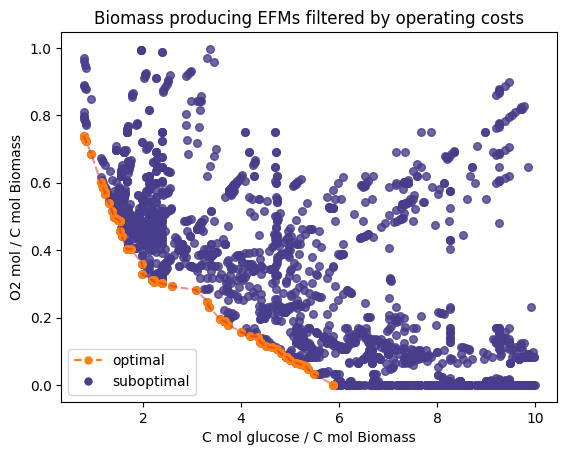

In [52]:
# plot pareto optimal efms
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('default')
s = plt.scatter(df_yields_filter['c_biomass_yield'], df_yields_filter['o2_biomass_yield'], color='darkslateblue', s=30, alpha=0.8)
s = plt.scatter(df_biomass_pareto['c_biomass_yield'], df_biomass_pareto['o2_biomass_yield'], color='C1', s=30)
plt.title("Biomass producing EFMs filtered by operating costs")
plt.xlabel('C mol glucose / C mol Biomass')
plt.ylabel('O2 mol / C mol Biomass')
yel = mlines.Line2D([], [], color='C1', marker='.', markersize=10, label='optimal', ls='--')
pur = mlines.Line2D([], [], color='darkslateblue', marker='.',markersize=10, label='suboptimal', ls='')
plt.plot(df_biomass_pareto['c_biomass_yield'], df_biomass_pareto['o2_biomass_yield'], '--', color='C3', label='Pareto frontier', alpha=0.5)
plt.legend(handles=[yel, pur])

In [53]:
# compute convex hull
from scipy.spatial import ConvexHull, convex_hull_plot_2d
df_hull_all = ConvexHull(df_yields_filter[['c_biomass_yield', 'o2_biomass_yield']])
df_hull_all.simplices
sp = set()
for simplex in df_hull_all.simplices:
    if (df_yields_filter.iloc[simplex[0]].name in df_biomass_pareto.index) and \
       (df_yields_filter.iloc[simplex[1]].name in df_biomass_pareto.index):
        sp.add(simplex[0])
        sp.add(simplex[1])
sp = list(sp)
df_hull = df_yields_filter.iloc[sp]
df_hull = df_hull.sort_values('c_biomass_yield')
df_hull

,ack,acn,ada,adh,ald,atp-synth,biomass,csn,cytbd,eda,...,rpi,scs,sdh,tal,tim,tkt1,tkt2,zwf,o2_biomass_yield,c_biomass_yield
5064,-5.607636,4.862475,0.000,0.000,1.408871,17.968548,0.120968,4.862475,19.109980,0.0,...,0.222177,4.504410,4.504410,-0.050000,1.408871,-0.050000,-0.172177,0.000000,0.739172,0.787947
4397,-2.495716,3.236845,0.000,0.000,2.152016,14.995968,0.120968,3.236845,15.580040,0.0,...,0.222177,2.878780,2.878780,-0.050000,2.152016,-0.050000,-0.172177,0.000000,0.602634,1.132884
4400,-0.946313,1.273313,0.000,0.000,0.889500,6.157000,0.050000,1.273313,6.346750,0.0,...,0.112500,1.125312,1.125312,0.000000,0.889500,0.000000,-0.050500,0.062000,0.593931,1.156092
4432,-1.667636,2.365161,0.000,0.000,1.761386,12.092079,0.099010,2.365161,12.342822,0.0,...,0.272772,2.072092,2.072092,0.050000,1.761386,0.050000,-0.050000,0.272772,0.583298,1.184447
5013,0.000000,1.891551,0.000,0.000,2.771051,14.200816,0.132021,1.891551,14.032285,0.0,...,0.480389,1.500768,1.500768,0.183341,2.771051,0.183341,0.050000,0.713730,0.497324,1.413710
862,0.919441,0.148000,0.000,0.000,1.177637,4.676118,0.050000,0.148000,4.311382,0.0,...,0.276667,0.000000,0.000000,0.164167,1.177637,0.164167,0.113667,0.554500,0.403461,1.664013
916,1.492542,0.148000,0.000,0.000,1.464187,3.529917,0.050000,0.148000,3.509042,0.0,...,0.276667,0.000000,0.000000,0.164167,1.464187,0.164167,0.113667,0.554500,0.328377,1.985799
892,1.575917,0.148000,0.000,0.000,1.672625,3.363167,0.050000,0.148000,3.258917,0.0,...,0.276667,0.000000,0.000000,0.164167,1.672625,0.164167,0.113667,0.554500,0.304971,2.219867
449,0.000000,0.148000,1.683,1.683,4.931542,-1.578750,0.050000,0.148000,0.000000,0.0,...,0.276667,0.000000,0.000000,0.164167,4.931542,0.164167,0.113667,0.554500,0.000000,5.879515


/tmp/ipykernel_20208/465860196.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(df_hull['c_biomass_yield'], df_hull['o2_biomass_yield'], 'k-', color='C3')


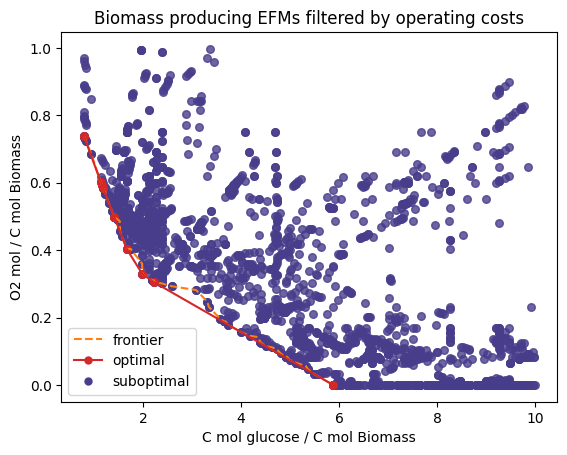

In [54]:
# plot pareto optimal efms which belong to the convex hull
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.style.use('default')
s = plt.scatter(df_yields_filter['c_biomass_yield'], df_yields_filter['o2_biomass_yield'], color='darkslateblue', s=30, alpha=0.8)
s = plt.scatter(df_biomass_pareto['c_biomass_yield'], df_biomass_pareto['o2_biomass_yield'], color='darkslateblue', s=30)
s = plt.scatter(df_hull['c_biomass_yield'], df_hull['o2_biomass_yield'], color='C3', s=30)
plt.title("Biomass producing EFMs filtered by operating costs")
plt.xlabel('C mol glucose / C mol Biomass')
plt.ylabel('O2 mol / C mol Biomass')
ora = mlines.Line2D([], [], color='C1', marker='', markersize=10, label='frontier', ls='--')
yel = mlines.Line2D([], [], color='C3', marker='.', markersize=10, label='optimal', ls='-')
pur = mlines.Line2D([], [], color='darkslateblue', marker='.',markersize=10, label='suboptimal', ls='')
plt.plot(df_biomass_pareto['c_biomass_yield'], df_biomass_pareto['o2_biomass_yield'], '--', color='C1', label='Pareto frontier', alpha=1)
plt.plot(df_hull['c_biomass_yield'], df_hull['o2_biomass_yield'], 'k-', color='C3')
plt.legend(handles=[ora, yel, pur])

In [55]:
df_pareto = df_hull.copy() # these are the efms we are interested in
df_pareto # efms in red in figure above


,ack,acn,ada,adh,ald,atp-synth,biomass,csn,cytbd,eda,...,rpi,scs,sdh,tal,tim,tkt1,tkt2,zwf,o2_biomass_yield,c_biomass_yield
5064,-5.607636,4.862475,0.000,0.000,1.408871,17.968548,0.120968,4.862475,19.109980,0.0,...,0.222177,4.504410,4.504410,-0.050000,1.408871,-0.050000,-0.172177,0.000000,0.739172,0.787947
4397,-2.495716,3.236845,0.000,0.000,2.152016,14.995968,0.120968,3.236845,15.580040,0.0,...,0.222177,2.878780,2.878780,-0.050000,2.152016,-0.050000,-0.172177,0.000000,0.602634,1.132884
4400,-0.946313,1.273313,0.000,0.000,0.889500,6.157000,0.050000,1.273313,6.346750,0.0,...,0.112500,1.125312,1.125312,0.000000,0.889500,0.000000,-0.050500,0.062000,0.593931,1.156092
4432,-1.667636,2.365161,0.000,0.000,1.761386,12.092079,0.099010,2.365161,12.342822,0.0,...,0.272772,2.072092,2.072092,0.050000,1.761386,0.050000,-0.050000,0.272772,0.583298,1.184447
5013,0.000000,1.891551,0.000,0.000,2.771051,14.200816,0.132021,1.891551,14.032285,0.0,...,0.480389,1.500768,1.500768,0.183341,2.771051,0.183341,0.050000,0.713730,0.497324,1.413710
862,0.919441,0.148000,0.000,0.000,1.177637,4.676118,0.050000,0.148000,4.311382,0.0,...,0.276667,0.000000,0.000000,0.164167,1.177637,0.164167,0.113667,0.554500,0.403461,1.664013
916,1.492542,0.148000,0.000,0.000,1.464187,3.529917,0.050000,0.148000,3.509042,0.0,...,0.276667,0.000000,0.000000,0.164167,1.464187,0.164167,0.113667,0.554500,0.328377,1.985799
892,1.575917,0.148000,0.000,0.000,1.672625,3.363167,0.050000,0.148000,3.258917,0.0,...,0.276667,0.000000,0.000000,0.164167,1.672625,0.164167,0.113667,0.554500,0.304971,2.219867
449,0.000000,0.148000,1.683,1.683,4.931542,-1.578750,0.050000,0.148000,0.000000,0.0,...,0.276667,0.000000,0.000000,0.164167,4.931542,0.164167,0.113667,0.554500,0.000000,5.879515


In [56]:
# Find an EFM from metatool in the ASP results 
import metatool_to_asp_efm
metatool_efm_reactions = metatool_to_asp_efm.read_meta("2355.txt")
efm_asp = metatool_to_asp_efm.comparaison(metatool_efm_reactions,all_efms)

4230
